Loading data from qfunc_2Dgrid_16_12.json
Loading data from qfunc_2Dgrid_25_12.json
Loading data from qfunc_2Dgrid_36_12.json
Loading data from qfunc_2Dgrid_49_12.json
Loading data from qfunc_2Dgrid_64_12.json
Loading data from qfunc_2Dgrid_16_20.json
Loading data from qfunc_2Dgrid_25_20.json
Loading data from qfunc_2Dgrid_36_20.json
Loading data from qfunc_2Dgrid_49_20.json
Loading data from qfunc_2Dgrid_64_20.json
Loading data from sigmoid_2Dgrid_16_12.json
Loading data from sigmoid_2Dgrid_25_12.json
Loading data from sigmoid_2Dgrid_36_12.json
Loading data from sigmoid_2Dgrid_49_12.json
Loading data from sigmoid_2Dgrid_64_12.json
Loading data from sigmoid_2Dgrid_16_20.json
Loading data from sigmoid_2Dgrid_25_20.json
Loading data from sigmoid_2Dgrid_36_20.json
Loading data from sigmoid_2Dgrid_49_20.json
Loading data from sigmoid_2Dgrid_64_20.json
Loading data from qfunc_complete_15_12.json
Loading data from qfunc_complete_25_12.json
Loading data from qfunc_complete_35_12.json
Loading 

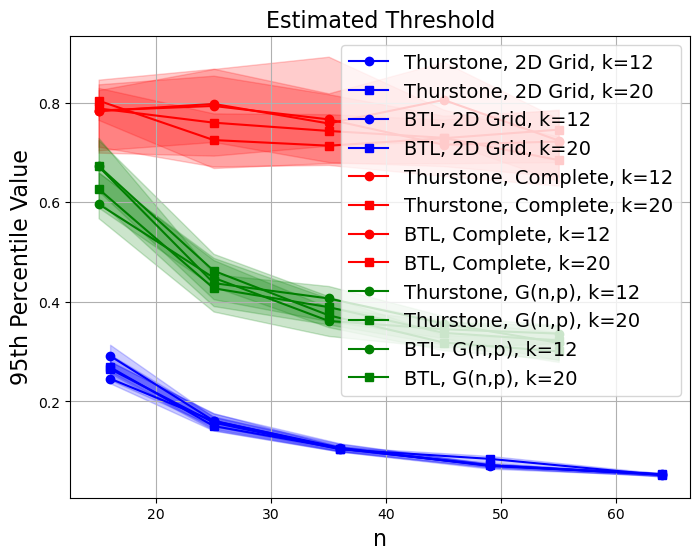

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# Define your variables
topologies = ['2Dgrid', 'complete', 'Erdos'] # Add your topologies here
models = ['qfunc', 'sigmoid'] # Add more models as needed
colors = ['b', 'r', 'g', 'k', 'c', 'y'] # Color cycle for different topologies
markers = ['o', 's', '^', 'd'] # Marker cycle for different k values
k_values = [12, 20] # Add your k values here
n_values = [15, 25, 35, 45, 55] # Add your n values here

plt.figure(figsize=(8, 6))

for topology_index, topology in enumerate(topologies):
    for model in models:
        for k_index, k in enumerate(k_values):
            color = colors[topology_index % len(colors)]
            marker = markers[k_index % len(markers)]
            percentile_95_values = []
            percentile_91_values = []
            percentile_99_values = []
            n_values2 = []
            for n in n_values:
                if topology == '2Dgrid':
                    n = int(np.ceil(np.sqrt(n)) ** 2)
                filename = f'{model}_{topology}_{n}_{k}.json'
                if os.path.exists(filename): # Check if the file exists
                    print(f'Loading data from {filename}')
                    with open(filename, 'r') as f:
                        data = json.load(f)
                    percentile_95 = np.percentile(data, 95)
                    percentile_91 = np.percentile(data, 92.5)
                    percentile_99 = np.percentile(data, 96.5)
                    percentile_95_values.append(percentile_95)
                    percentile_91_values.append(percentile_91)
                    percentile_99_values.append(percentile_99)
                    n_values2.append(n)
                else:
                    print(f'Skipping file {filename} as it does not exist')

            if topology == 'Erdos':
                topology_title = 'G(n,p)'
            elif topology == 'complete':
                topology_title = 'Complete'
            elif topology == '2Dgrid':
                topology_title = '2D Grid'

            # Plot if there are data points to plot
            if n_values2:
                if model == 'qfunc':
                    plt.plot(n_values2, percentile_95_values, label=f'Thurstone, {topology_title}, k={k}', marker=marker, color=color)
                else:
                    plt.plot(n_values2, percentile_95_values, label=f'BTL, {topology_title}, k={k}', marker=marker, color=color)
                plt.fill_between(n_values2, percentile_91_values, percentile_99_values, color=color, alpha=0.2)

plt.title('Estimated Threshold', fontsize =16)
plt.ylabel('95th Percentile Value', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig(f'SyntheticExp1_{topology}.pdf')
plt.show()

